In [1]:
import pandas as pd
import numpy as np
import shutil
import os
import itertools
import random
from data_module import *
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix,accuracy_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import imagenet_utils

In [2]:
Testgenerator = BalanceCovidDataset(data_dir="/home/magnus_pierrau/notebooks_etc/New_cropped_imgs/",
                                csv_file="/home/magnus_pierrau/notebooks_etc/New_cropped_imgs/test_split_v5.txt",
                                covid_percent=0.1,
                                batch_size=100,
                                is_training=False,
                                augmentation=False,
                                class_weights=[1., 1., 1.]) #weights for normal, pneumonia, covid19

In [3]:
model=tf.keras.models.load_model('/home/magnus_pierrau/notebooks_etc/model1')

In [4]:
pred=model.predict(Testgenerator)

In [5]:
testY_idx=[]
for i in range(len(Testgenerator)):
    distribution=next(Testgenerator)[1]
    testY_idx.append(distribution.argmax(axis=1))
testY_idx=np.asarray(list(itertools.chain.from_iterable(testY_idx)))
testY_idx=np.asarray(testY_idx)

In [6]:
predIdxs = np.argmax(pred, axis=1)

In [7]:
testY_idx.shape

(1500,)

In [8]:
def plot_confusion_matrix(cm, labels):
#     cm=confusion_matrix(ground_truth, predictions, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    sn.set(font_scale=0.9) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt="d") # font size
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    

              precision    recall  f1-score   support

      normal       0.82      0.83      0.83       805
   pneumonia       0.87      0.73      0.79       643
    COVID-19       0.03      0.10      0.05        52

    accuracy                           0.76      1500
   macro avg       0.57      0.55      0.56      1500
weighted avg       0.81      0.76      0.78      1500



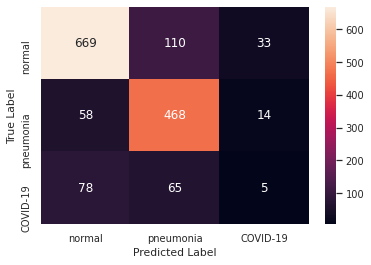

acc: 0.7580
sensitivity: 0.8588
specificity: 0.8897


In [9]:

print(classification_report(predIdxs, testY_idx,target_names=['normal','pneumonia','COVID-19']))
cm = confusion_matrix(testY_idx, predIdxs)

plot_confusion_matrix(cm, ['normal','pneumonia','COVID-19'])


total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity


print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))